In [13]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [17]:
# Read the stats from the json files
with open('../artifacts/models_stats/actor_critic/actor_critic_v1_sim.json') as f:
    stats_actor_critic = json.load(f)
    
with open('../artifacts/models_stats/dqn/dqn_sim_metrics_par_300_20_100.json') as f:
    stats_dqn = json.load(f)
    
with open('../artifacts/models_stats/q-learning/q_learning_sim_metrics_par_50000_20_100.json') as f:
    stats_q_learning = json.load(f)
    
with open('../artifacts/models_stats/sarsa/sarsa_sim_metrics_par_50000_20_100.json') as f:
    stats_sarsa = json.load(f)

with open('../artifacts/models_stats/polNet/polNet_sim_metrics_par_10000_20_100.json') as f:
    stats_pol = json.load(f)

In [19]:
# Compute the average reward for each model
average_reward_actor_critic = np.mean(stats_actor_critic['episode_rewards'])
average_reward_dqn = np.mean(stats_dqn['episode_rewards'])
average_reward_q_learning = np.mean(stats_q_learning['episode_rewards'])
average_reward_sarsa = np.mean(stats_sarsa['episode_rewards'])
average_reward_pol = np.mean(stats_pol['episode_rewards'])

# Compute the average snake length for each model
average_snake_length_actor_critic = np.mean(stats_actor_critic['snake_lengths'])
average_snake_length_dqn = np.mean(stats_dqn['snake_lengths'])
average_snake_length_q_learning = np.mean(stats_q_learning['snake_lengths'])
average_snake_length_sarsa = np.mean(stats_sarsa['snake_lengths'])
average_snake_length_pol = np.mean(stats_pol['snake_lengths'])

In [20]:
from tabulate import tabulate

# Store the rewards and snake lengths in lists of tuples
rewards = [
    ('Actor-Critic', average_reward_actor_critic),
    ('DQN', average_reward_dqn),
    ('Q-Learning', average_reward_q_learning),
    ('SARSA', average_reward_sarsa),
    ('Policy Network', average_reward_pol)
]

snake_lengths = [
    ('Actor-Critic', average_snake_length_actor_critic),
    ('DQN', average_snake_length_dqn),
    ('Q-Learning', average_snake_length_q_learning),
    ('SARSA', average_snake_length_sarsa),
    ('Policy Network', average_snake_length_pol)
]

# Sort the lists by the second element in each tuple (the value)
rewards.sort(key=lambda x: x[1], reverse=True)
snake_lengths.sort(key=lambda x: x[1], reverse=True)

# Print the sorted results using tabulate
print('Results:')
print(tabulate(rewards, headers=['Algorithm', 'Average Reward'], tablefmt='pretty'))

print('')
print(tabulate(snake_lengths, headers=['Algorithm', 'Average Snake Length'], tablefmt='pretty'))

Results:
+----------------+----------------+
|   Algorithm    | Average Reward |
+----------------+----------------+
|   Q-Learning   |    2354.42     |
|  Actor-Critic  |    2211.19     |
|     SARSA      |    2195.79     |
|      DQN       |    2171.97     |
| Policy Network |     440.54     |
+----------------+----------------+

+----------------+----------------------+
|   Algorithm    | Average Snake Length |
+----------------+----------------------+
|   Q-Learning   |        28.48         |
|  Actor-Critic  |        26.83         |
|     SARSA      |        26.55         |
|      DQN       |        26.33         |
| Policy Network |         6.8          |
+----------------+----------------------+


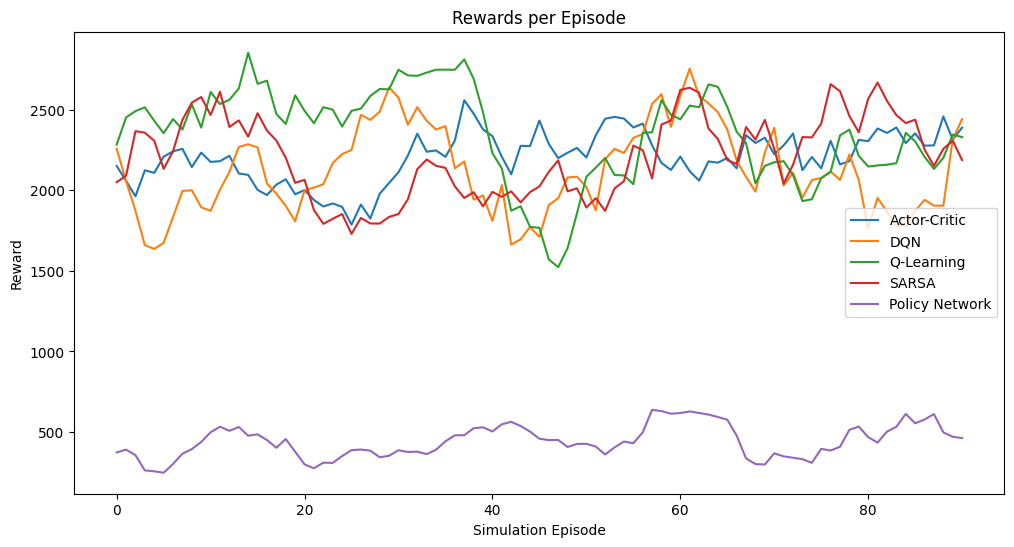

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Function to smooth the data
def smooth(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot the whole rewards throughout the history
plt.figure(figsize=(12, 6))

# Smooth the data
plt.plot(smooth(stats_actor_critic['episode_rewards']), label='Actor-Critic')
plt.plot(smooth(stats_dqn['episode_rewards']), label='DQN')
plt.plot(smooth(stats_q_learning['episode_rewards']), label='Q-Learning')
plt.plot(smooth(stats_sarsa['episode_rewards']), label='SARSA')
plt.plot(smooth(stats_pol['episode_rewards']), label='Policy Network')

plt.xlabel('Simulation Episode')
plt.ylabel('Reward')
plt.title('Rewards per Episode')
plt.legend()
plt.show()